In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
#to be import
df = pd.read_csv("sorting_results.csv")
df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons
0,5,1000,MergeSort,2,6407
1,5,1000,HybridMergeSort,0,8757
2,5,2000,MergeSort,9,14483
3,5,2000,HybridMergeSort,1,19541
4,5,3000,MergeSort,2,23161
...,...,...,...,...,...
515,100,300000,HybridMergeSort,40,9280618
516,100,500000,MergeSort,14982,6348544
517,100,500000,HybridMergeSort,89,14445785
518,100,1000000,MergeSort,32350,13487283


In [3]:
hybrid_df = df[df['Algorithm'] == 'HybridMergeSort']
hybrid_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons
1,5,1000,HybridMergeSort,0,8757
3,5,2000,HybridMergeSort,1,19541
5,5,3000,HybridMergeSort,1,31484
7,5,5000,HybridMergeSort,1,55718
9,5,10000,HybridMergeSort,3,121499
...,...,...,...,...,...
511,100,100000,HybridMergeSort,14,3504959
513,100,200000,HybridMergeSort,32,7221537
515,100,300000,HybridMergeSort,40,9280618
517,100,500000,HybridMergeSort,89,14445785


In [4]:
merge_df = df[df['Algorithm'] == 'MergeSort']
merge_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons
0,5,1000,MergeSort,2,6407
2,5,2000,MergeSort,9,14483
4,5,3000,MergeSort,2,23161
6,5,5000,MergeSort,4,41475
8,5,10000,MergeSort,8,92886
...,...,...,...,...,...
510,100,100000,MergeSort,217,1100066
512,100,200000,MergeSort,977,2372899
514,100,300000,MergeSort,5307,3658906
516,100,500000,MergeSort,14982,6348544


## ci. (Fixed threshold) Key comparison vs Array size
With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity

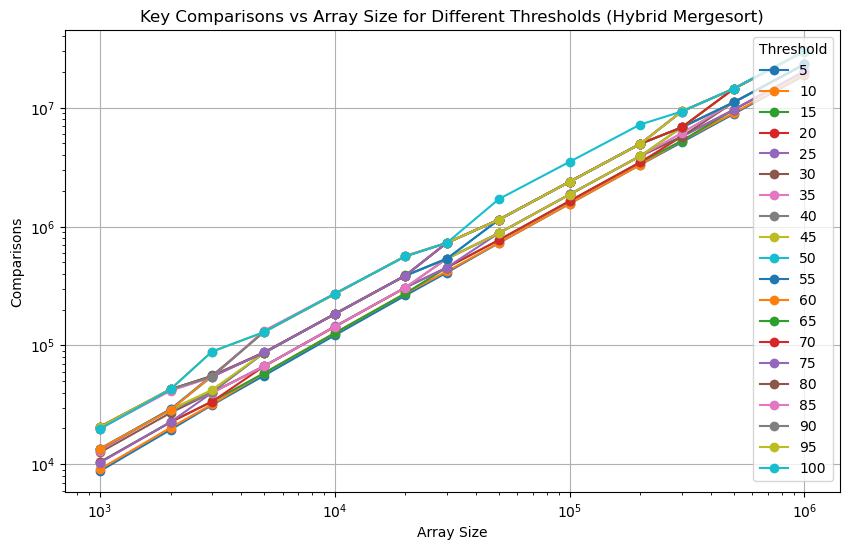

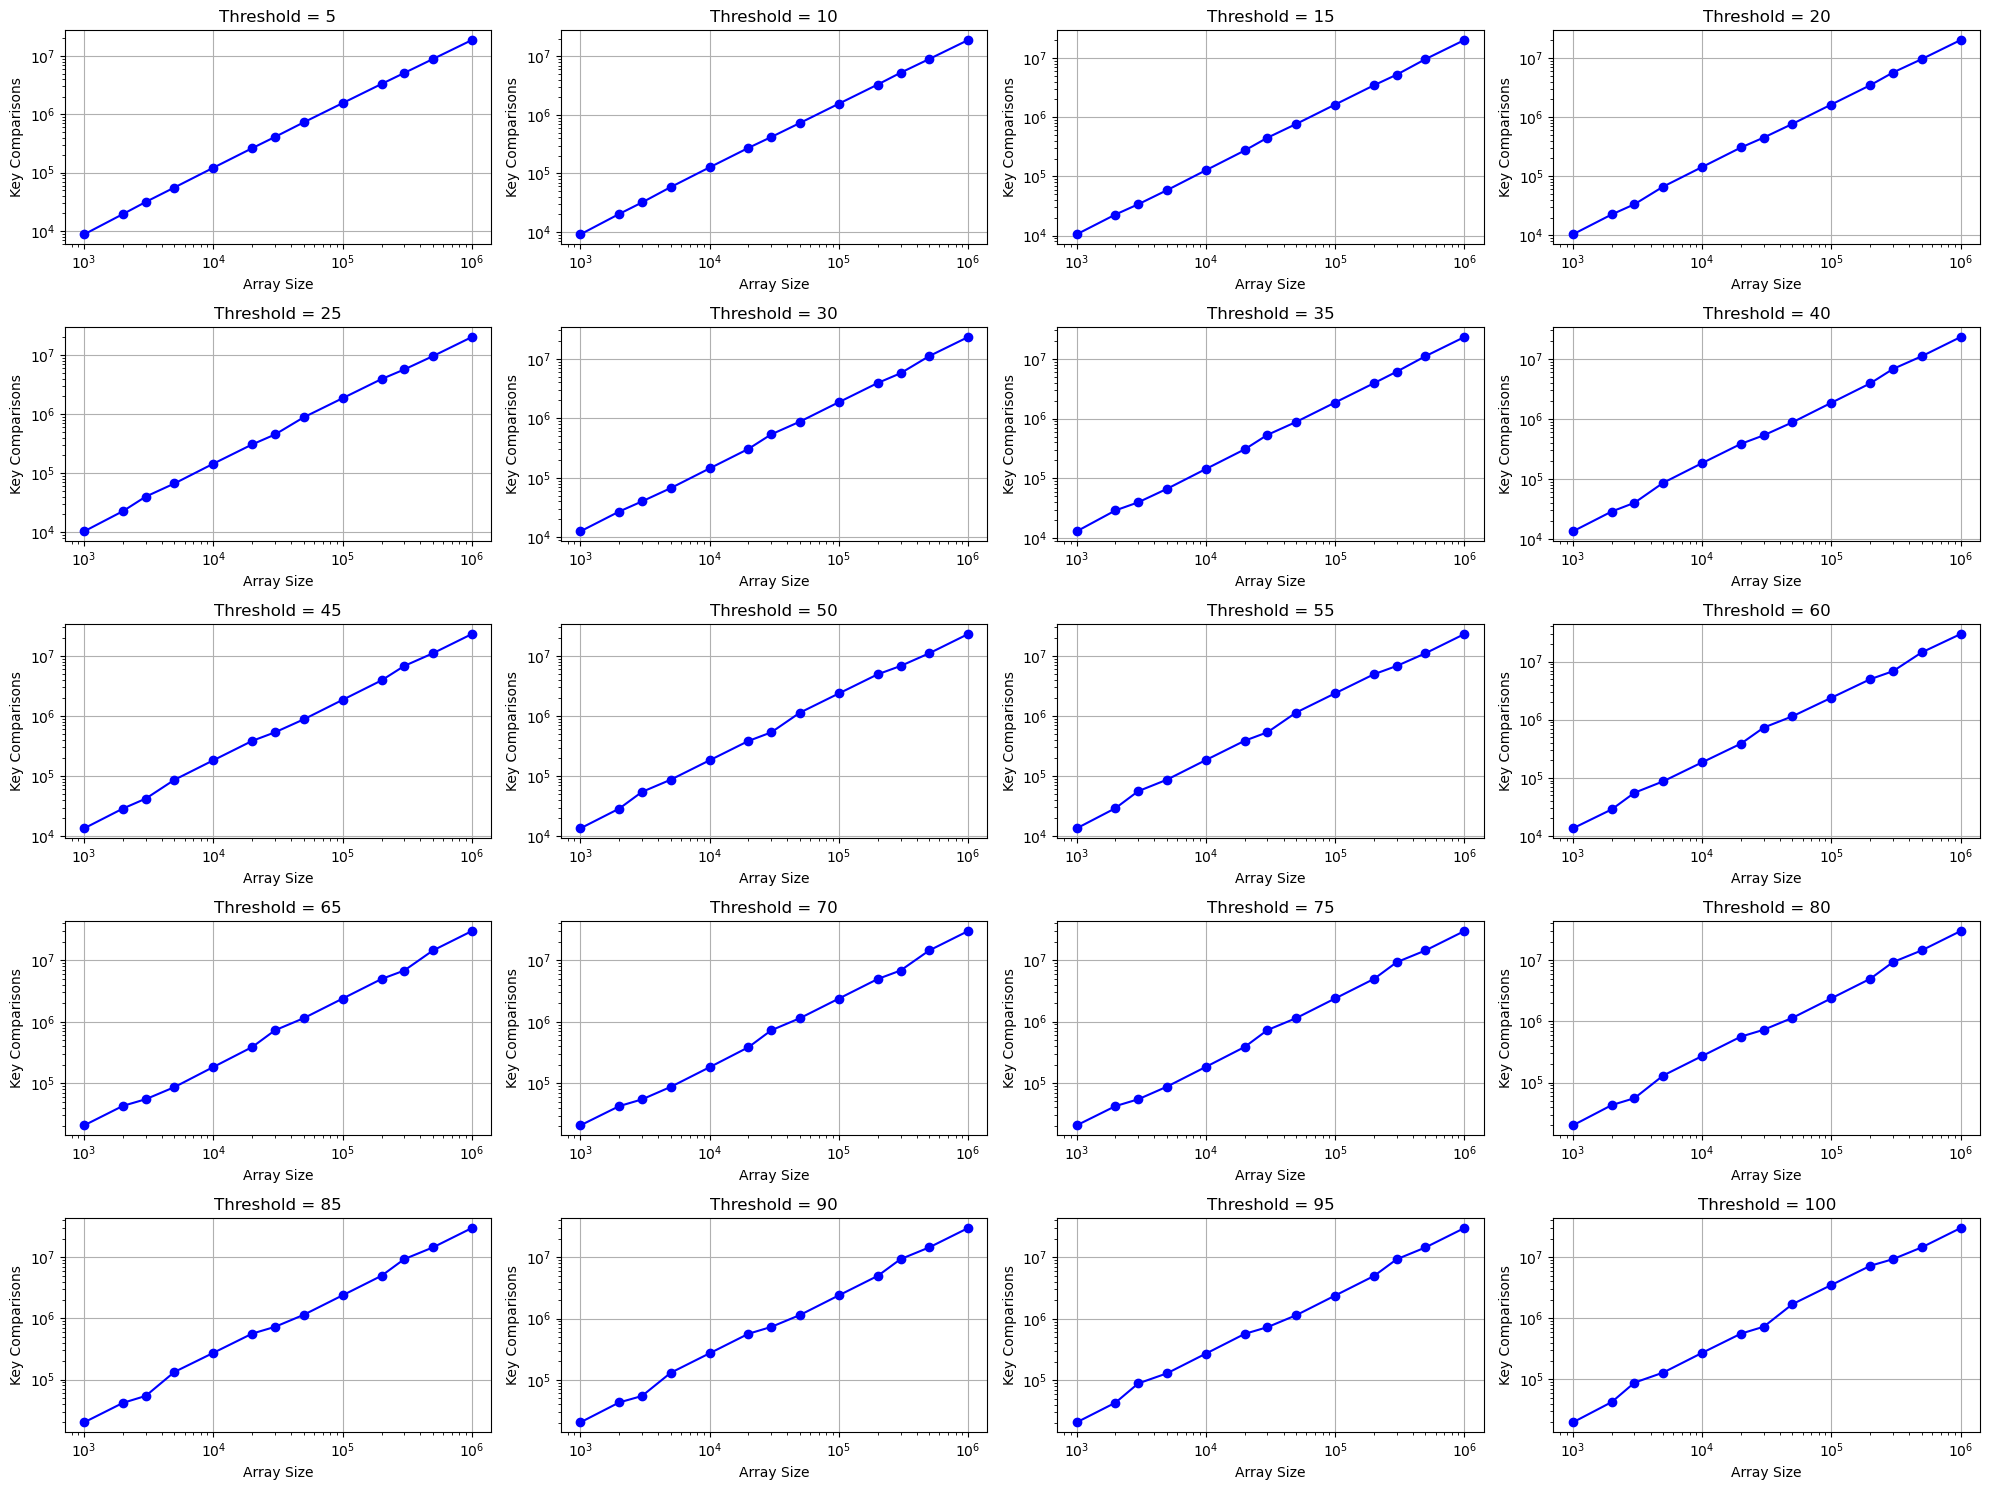

In [5]:
#1. Combined graph
plt.figure(figsize=(10, 6))

# Group the data by threshold and plot each group
for Threshold, group in hybrid_df.groupby('Threshold'):
    plt.plot(group['Array Size'], group['Comparisons'], marker='o', label=f'{Threshold}')

plt.title('Key Comparisons vs Array Size for Different Thresholds (Hybrid Mergesort)')
plt.xlabel('Array Size')
plt.ylabel('Comparisons')
plt.legend(title="Threshold")
plt.grid(True)
plt.xscale('log')  # Logarithmic scale for array size if necessary
plt.yscale('log')  # Logarithmic scale for key comparisons if necessary
plt.show()

#2. Separate graph
fig, axes = plt.subplots(5, 4, figsize=(20, 15)) 
axes = axes.flatten()

unique_thresholds = hybrid_df['Threshold'].unique()
for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    axes[i].set_xscale('log')  # Logarithmic scale for array size
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons

plt.tight_layout()
plt.show()

Empirical vs Theoretical 

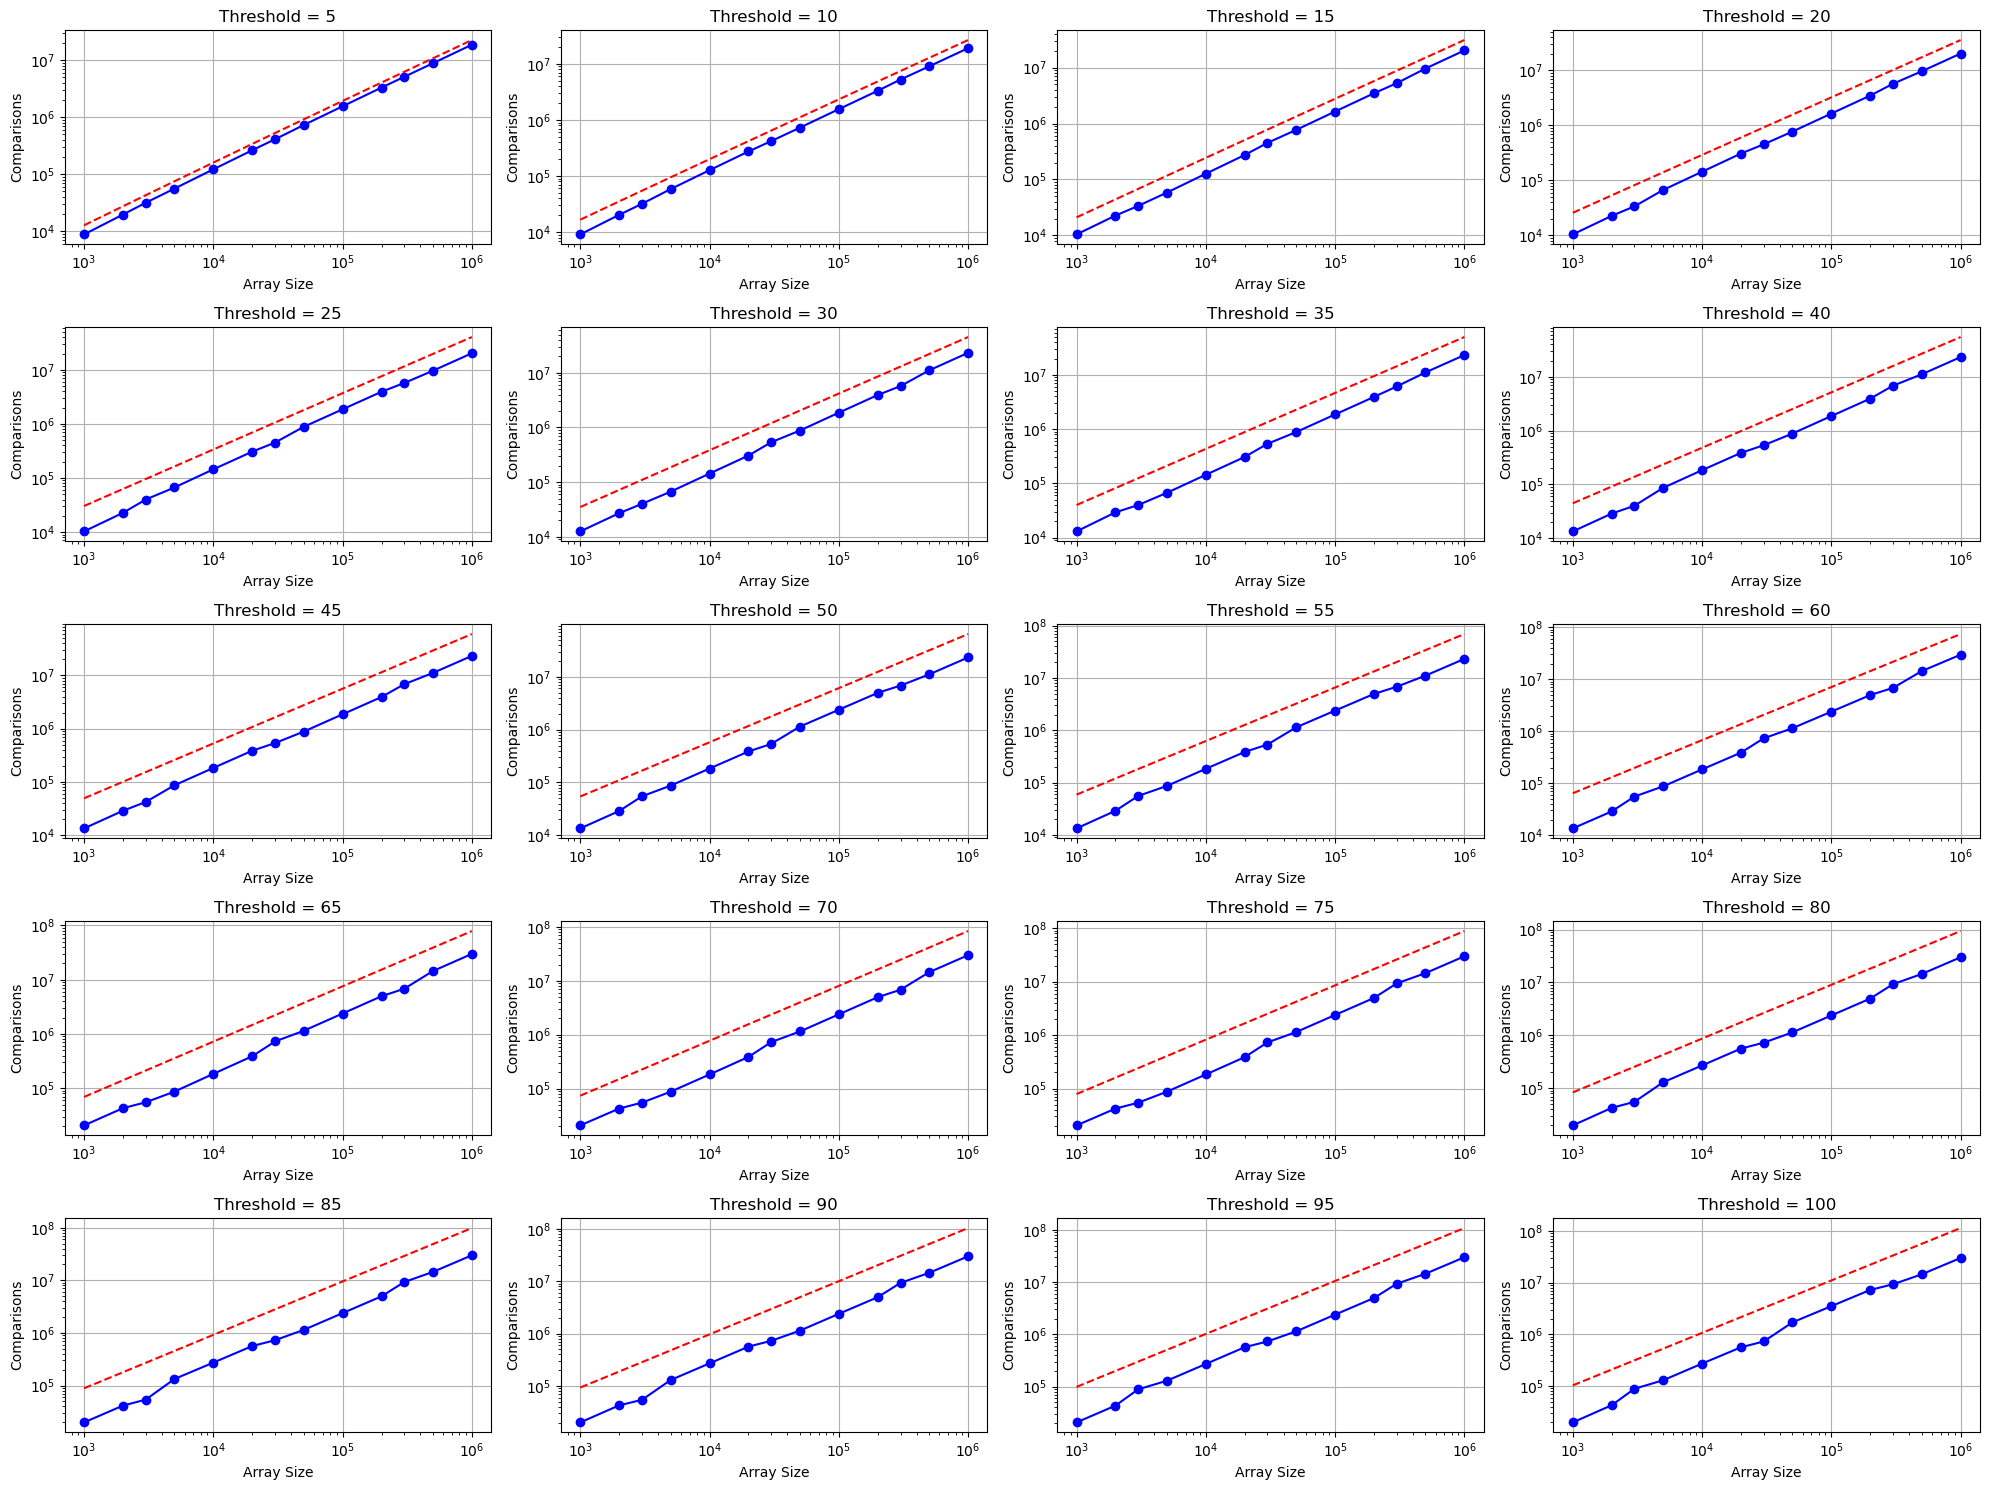

In [5]:
n = hybrid_df['Array Size'].unique()

fig, axes = plt.subplots(5, 4, figsize=(20, 15)) 
axes = axes.flatten()

unique_thresholds = hybrid_df['Threshold'].unique()
for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    k = Threshold
    theoretical_values = n*k + n*np.log2(n/k)
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')
    axes[i].plot(n, theoretical_values, label="Theoretical", linestyle="--", color="red")

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Comparisons')
    axes[i].grid(True)
    axes[i].set_xscale('log')  # Logarithmic scale for array size
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons

plt.tight_layout()
plt.show()

## cii. (Fixed Array Size) Key Comparisons vs Threshold

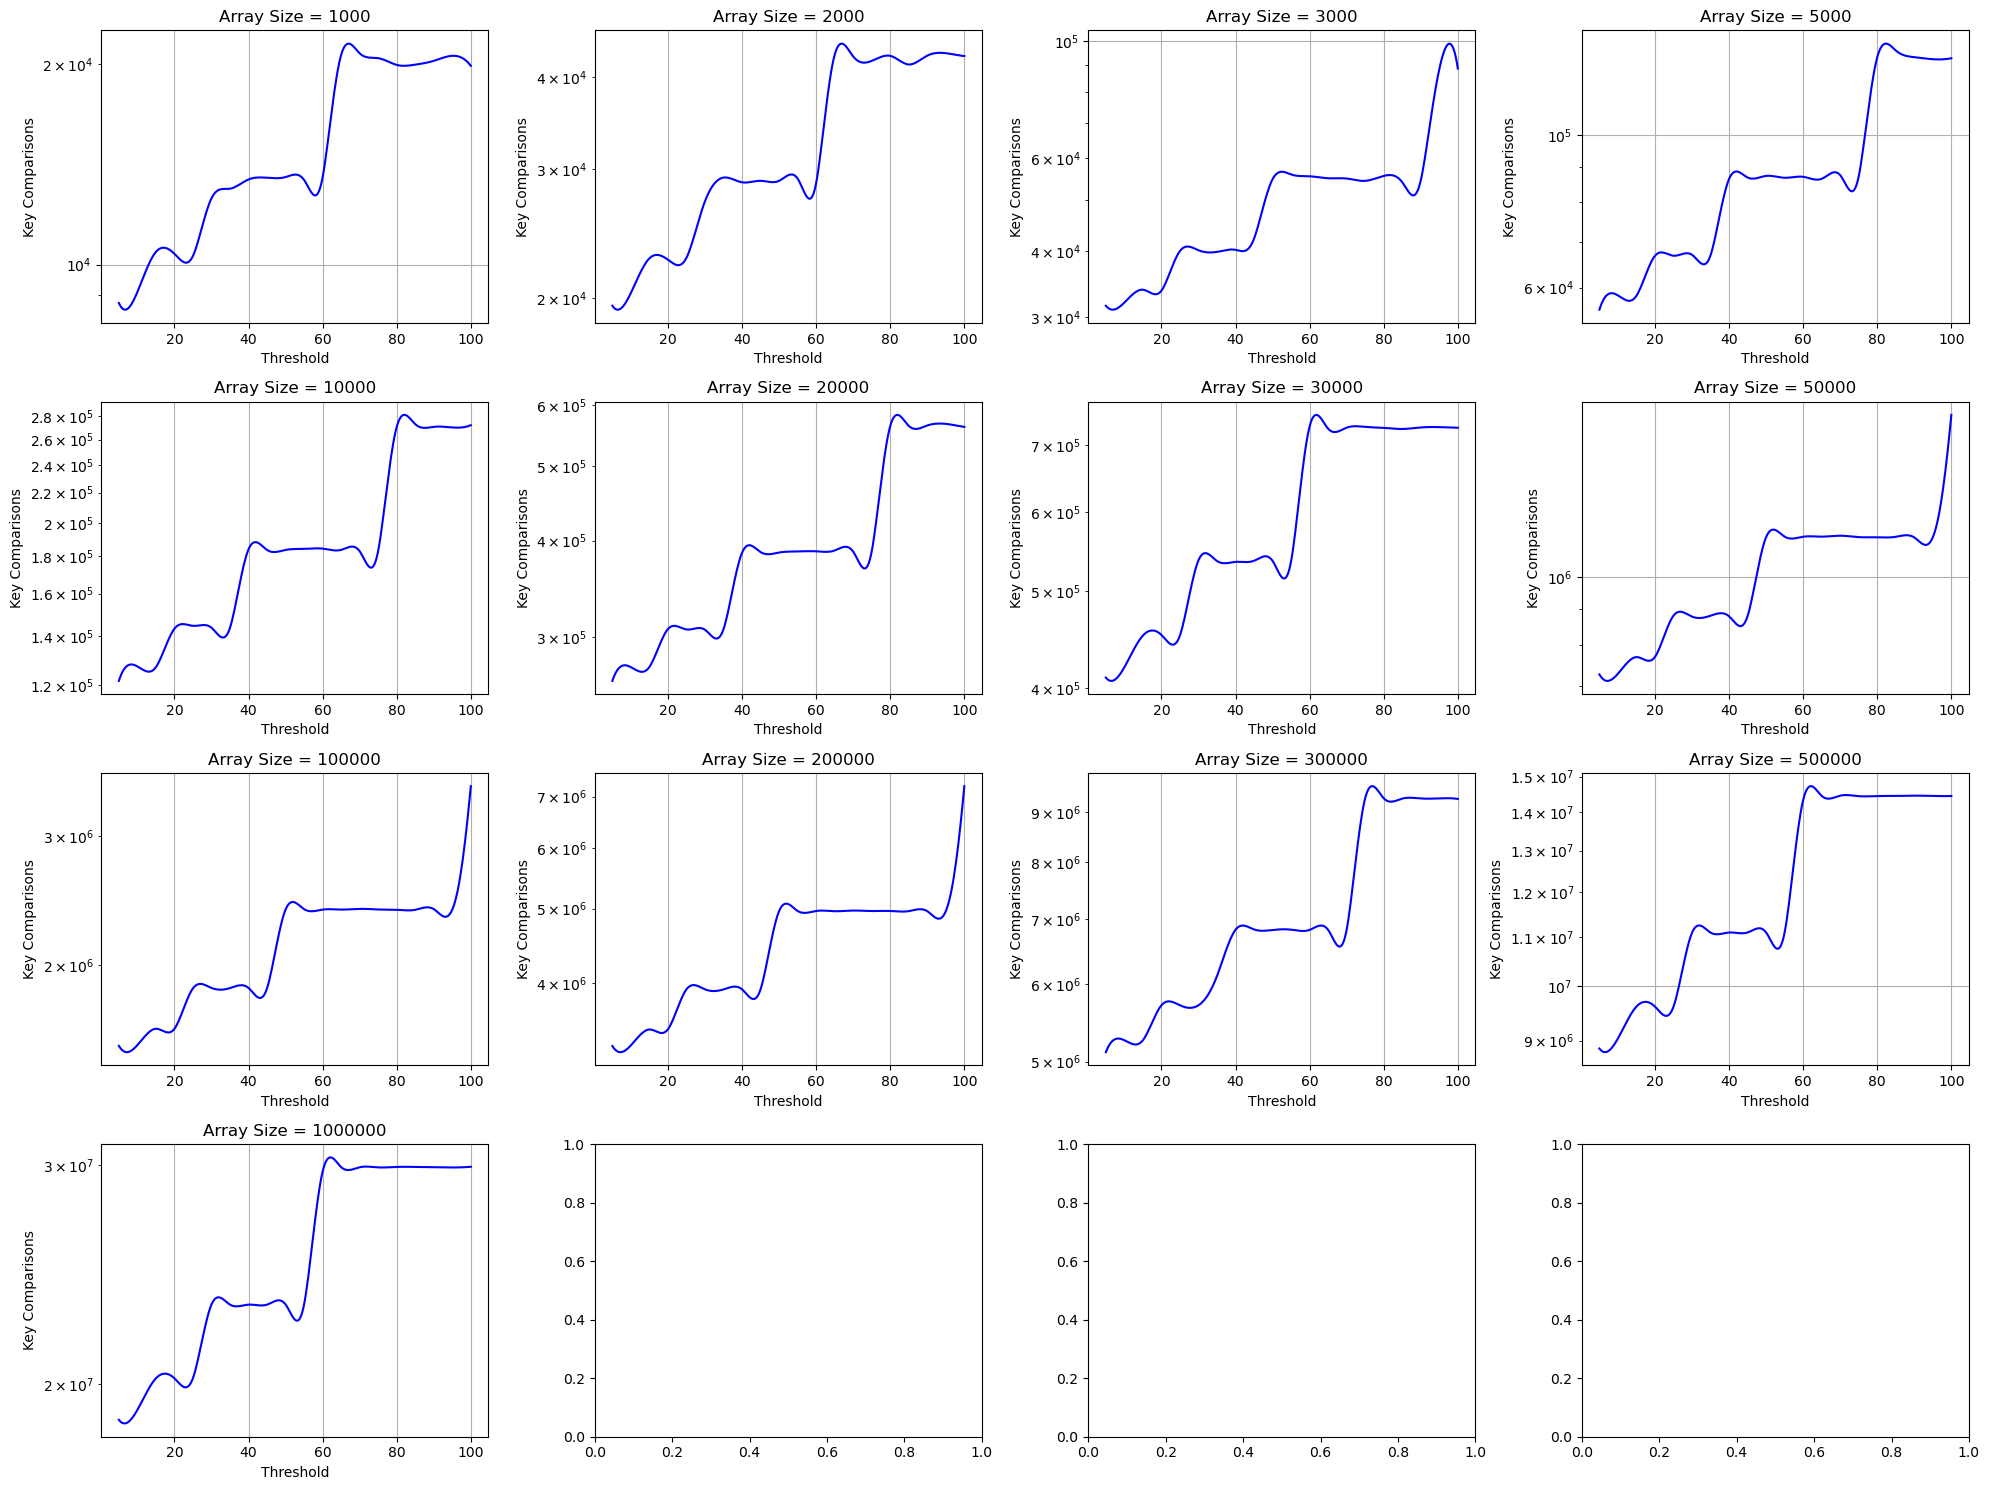

In [7]:
unique_array_sizes = hybrid_df['Array Size'].unique()

num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot the smoothed Key Comparisons vs Threshold on the corresponding subplot
    x_new = np.linspace(df_size['Threshold'].min(), df_size['Threshold'].max(), 300)
    spl = make_interp_spline(df_size['Threshold'], df_size['Comparisons'], k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)
    axes[i].plot(x_new, y_smooth, marker='', linestyle='-', color='b')
    
    # Plot Key Comparisons vs Threshold on the corresponding subplot
    #axes[i].plot(df_size['Threshold'], df_size['Comparisons'], marker='o', linestyle='-', color='b')
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons if necessary

# Adjust layout so that titles and labels don't overlap
plt.tight_layout()

plt.show()

## ciii. (Fixed Array Size) Time Complexity vs Threshold

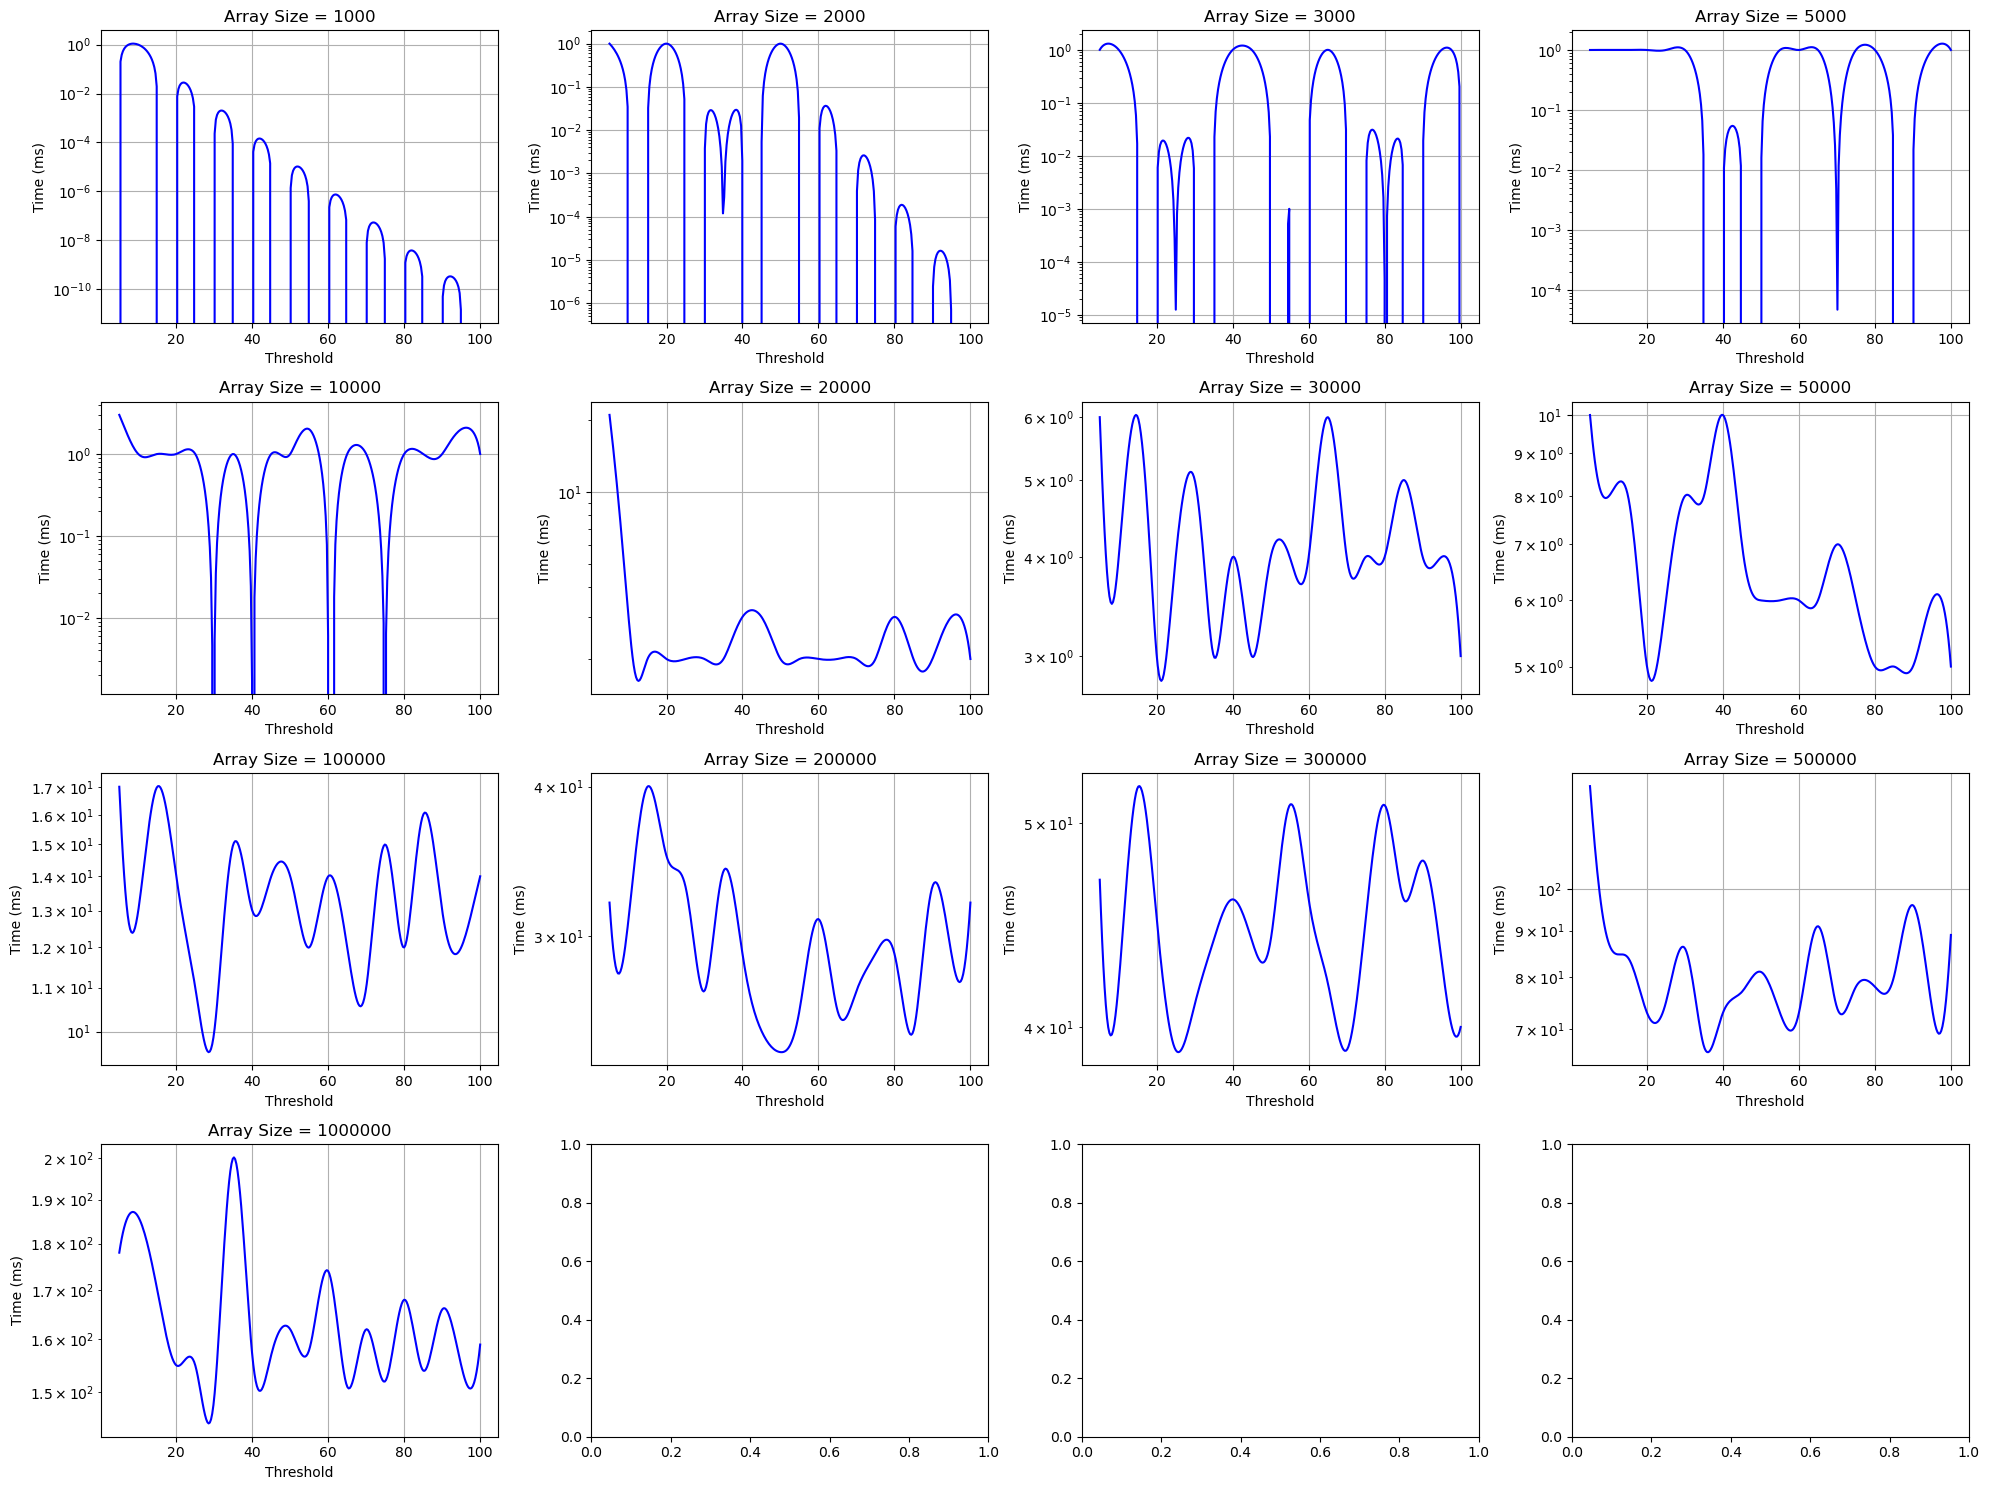

In [8]:
num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot the smoothed Key Comparisons vs Threshold on the corresponding subplot
    x_new = np.linspace(df_size['Threshold'].min(), df_size['Threshold'].max(), 300)
    spl = make_interp_spline(df_size['Threshold'], df_size['Time (ms)'], k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)
    axes[i].plot(x_new, y_smooth, marker='', linestyle='-', color='b')
    
    # Plot Time vs Threshold on the corresponding subplot
    #axes[i].plot(df_size['Threshold'], df_size['Time (ms)'], marker='o', linestyle='-', color='b')
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Time (ms)')
    axes[i].grid(True)
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons if necessary

plt.tight_layout()

plt.show()

## 4. Compare with original MergeSort
Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above
hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with <b>10 million integers</b>.

# 下面的没有用到but我放着as a reference先 

## Key Comparisons
1. Emphirical vs Theoretical (for Hybrid Merge-Insertion Sort)
2. Hybrid Merge-Insertion Sort vs Standard Merge Sort

In [9]:
'''
n = hybrid_df["n"].unique()
k = threshold
theoretical_values = 

# line plot for Emphirical vs Theoretical
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[0], label="Emphirical")
ax[0].set_title("Empirical vs Theoretical") 

# Plot the theoretical analysis curve
ax[0].plot(
    n_values, theoretical_values, label="Theoretical", linestyle="--", color="red"
)
ax[0].legend() 


# line plot for Hybrid vs Standard Merge Sort
sb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[1], label="Hybrid Merge Sort", color="blue")
sb.lineplot(data=standard_merge_df, y="compareCount", x="n", ax=ax[0], label="Standard Merge Sort", color="red")
ax[1].set_title("Hybrid vs Standard")  

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 50_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()
'''

'\nn = hybrid_df["n"].unique()\nk = threshold\ntheoretical_values = \n\n# line plot for Emphirical vs Theoretical\nf, ax = plt.subplots(1, 2, figsize=(15, 5))\n\nsb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[0], label="Emphirical")\nax[0].set_title("Empirical vs Theoretical") \n\n# Plot the theoretical analysis curve\nax[0].plot(\n    n_values, theoretical_values, label="Theoretical", linestyle="--", color="red"\n)\nax[0].legend() \n\n\n# line plot for Hybrid vs Standard Merge Sort\nsb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[1], label="Hybrid Merge Sort", color="blue")\nsb.lineplot(data=standard_merge_df, y="compareCount", x="n", ax=ax[0], label="Standard Merge Sort", color="red")\nax[1].set_title("Hybrid vs Standard")  \n\n# Set x-axis limits to show from 0 to 50,000,000\nx_min = 0\nx_max = 50_000_000  # Use underscores for readability\n\nax[0].set_xlim(x_min, x_max)\nax[1].set_xlim(x_min, x_max)\n\n# tight layout to prevent overlapping\nplt.tight_layout()

## Run Time
1. Hybrid Merge-Insertion Sort (Emphirical)
2. Hybrid Merge-Insertion Sort vs Standard Merge Sort

In [10]:
'''
# line plot for key comparison
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[0], label="Emphirical")
ax[0].set_title("Hybrid (Emphirical)")  # set title for first subplot
ax[0].legend()  # Add a legend to the plot

# line plot for time
sb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[1], label="Emphirical", color="blue")
sb.lineplot(data=standard_merge_df,y="time",x="n",ax=ax[1], label="Emphirical", color="red")
ax[1].set_title("Hybrid vs Standard")  # set title for second subplot

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 50_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()
'''

'\n# line plot for key comparison\nf, ax = plt.subplots(1, 2, figsize=(15, 5))\n\nsb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[0], label="Emphirical")\nax[0].set_title("Hybrid (Emphirical)")  # set title for first subplot\nax[0].legend()  # Add a legend to the plot\n\n# line plot for time\nsb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[1], label="Emphirical", color="blue")\nsb.lineplot(data=standard_merge_df,y="time",x="n",ax=ax[1], label="Emphirical", color="red")\nax[1].set_title("Hybrid vs Standard")  # set title for second subplot\n\n# Set x-axis limits to show from 0 to 50,000,000\nx_min = 0\nx_max = 50_000_000  # Use underscores for readability\n\nax[0].set_xlim(x_min, x_max)\nax[1].set_xlim(x_min, x_max)\n\n# tight layout to prevent overlapping\nplt.tight_layout()\n\nplt.show()\n'